In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import lingam

from graphviz import Digraph
from lingam.utils import make_dot
from IPython.display import Image, display, Markdown
import matplotlib.dates as mdates

In [2]:
# Edges
df_edges_plant = pd.read_csv("../data/SupplyGraph/Edges/Edges (Plant).csv")
df_edges_product_group = pd.read_csv("../data/SupplyGraph/Edges/Edges (Product Group).csv")
df_edges_product_subgroup = pd.read_csv("../data/SupplyGraph/Edges/Edges (Product Sub-Group).csv")
df_edges_storage_location = pd.read_csv("../data/SupplyGraph/Edges/Edges (Storage Location).csv")


# Nodes
df_nodes_productgroup_and_subgroup = pd.read_csv("../data/SupplyGraph/Nodes/Node Types (Product Group and Subgroup).csv")
df_nodes_plant_and_storage = pd.read_csv("../data/SupplyGraph/Nodes/Nodes Type (Plant & Storage).csv")
df_nodes = pd.read_csv("../data/SupplyGraph/Nodes/Nodes.csv")
df_nodes_index = pd.read_csv("../data/SupplyGraph/Nodes/NodesIndex.csv")


# Temporal
df_delivery_to_distributor = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Delivery To distributor.csv")
df_factory_issue = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Factory Issue.csv")
df_production = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Production.csv")
df_sales_order = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Sales Order.csv")

## Node Definitions

- **Product**: `df_nodes` (contains all products)
- **ProductGroup**: `df_nodes_productgroup_and_subgroup` (Product Group types)
- **Production Facility**: `df_nodes_plant_and_storage` (Plant nodes)
- **Storage Location**: `df_nodes_plant_and_storage` (Storage nodes)
- **Distributor**: Not explicitly present in the loaded dataframes
- **SalesOrder**: `df_unit_sales_order`, `df_weight_sales_order` (temporal data)
- **Delivery**: `df_unit_delivery_to_distributor`, `df_weight_delivery_to_distributor` (temporal data)
- **FactoryIssue**: `df_unit_factory_issue`, `df_weight_factory_issue` (temporal data)

## Edge Definitions

- **Product → ProductGroup** (belongs to): `df_edges_product_group`, `df_edges_edgeindex_product_group`
- **Product → ProductionFacility** (produced at): `df_edges_plant`, `df_edges_edgeindex_plant`
- **Product → Storage** (stored at): `df_edges_storage_location`, `df_edges_edgeindex_storage_location`
- **Product → Distributor** (delivered to): `df_unit_delivery_to_distributor`, `df_weight_delivery_to_distributor`
- **ProductGroup → ProductionFacility** (uses raw materials): `df_edges_product_sub_group`, `df_edges_edgeindex_product_sub_group`
- **ProductionFacility → Storage** (sends): `df_edges_plant`, `df_edges_storage_location`
- **Storage → Distributor** (ships to): `df_unit_delivery_to_distributor`, `df_weight_delivery_to_distributor`
- **SalesOrder → Product** (requested for): `df_unit_sales_order`, `df_weight_sales_order`
- **ProductionFacility → Delivery** (dispatches): `df_unit_delivery_to_distributor`, `df_weight_delivery_to_distributor`
- **ProductionFacility → FactoryIssue** (logs issue): `df_unit_factory_issue`, `df_weight_factory_issue`
- **Delivery → Distributor** (received by): `df_unit_delivery_to_distributor`, `df_weight_delivery_to_distributor`
- **FactoryIssue → Storage** (issues to): `df_unit_factory_issue`, `df_weight_factory_issue`

**Note**: The `df_unit_production` and `df_weight_production` dataframes are loaded but not directly represented in this GraphViz diagram.

In [3]:
product = "SOS005L04P"

<br> <br> <br>

the relation between the Product 

In [4]:
# The group and sub-group the product SOS005L04P belongs to.
display(df_nodes_productgroup_and_subgroup[df_nodes_productgroup_and_subgroup['Node'] == product])

,Node,Group,Sub-Group
1,SOS005L04P,S,SOS


,Node,Plant,Storage Location
0,SOS005L04P,2103,330.0
1,SOS005L04P,2103,330.0
2,SOS005L04P,2103,330.0
3,SOS005L04P,2103,330.0
4,SOS005L04P,2103,330.0
...,...,...,...
952,SOS005L04P,2122,2230.0
953,SOS005L04P,2122,2230.0
954,SOS005L04P,2122,2230.0
955,SOS005L04P,2122,2230.0


**Unique Rows:**

,Node,Plant,Storage Location
0,SOS005L04P,2120,2030.0
1,SOS005L04P,2111,1130.0
2,SOS005L04P,2121,2130.0
3,SOS005L04P,2119,1930.0
4,SOS005L04P,2114,1430.0
5,SOS005L04P,2116,1630.0
6,SOS005L04P,2112,1230.0
7,SOS005L04P,2117,1730.0
8,SOS005L04P,2115,1530.0
9,SOS005L04P,2103,330.0


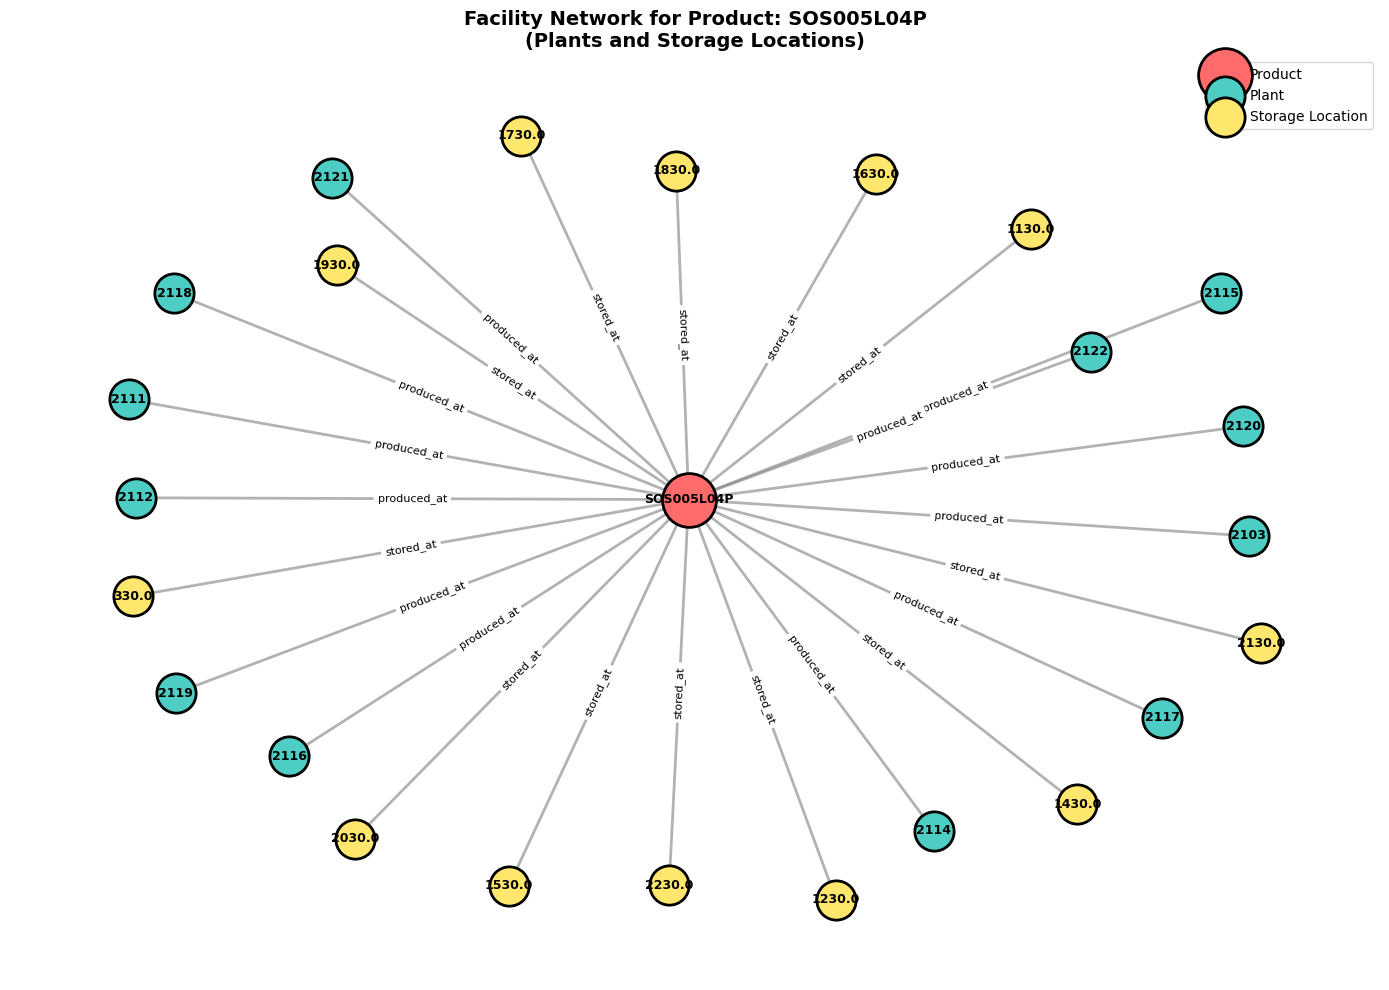


Graph Statistics:
Total nodes: 25
Total edges: 24
Plants: 12
Storage locations: 12

Facilities connected to SOS005L04P:
  - 1130.0 (storage)
  - 1230.0 (storage)
  - 1430.0 (storage)
  - 1530.0 (storage)
  - 1630.0 (storage)
  - 1730.0 (storage)
  - 1830.0 (storage)
  - 1930.0 (storage)
  - 2030.0 (storage)
  - 2103 (plant)
  - 2111 (plant)
  - 2112 (plant)
  - 2114 (plant)
  - 2115 (plant)
  - 2116 (plant)
  - 2117 (plant)
  - 2118 (plant)
  - 2119 (plant)
  - 2120 (plant)
  - 2121 (plant)
  - 2122 (plant)
  - 2130.0 (storage)
  - 2230.0 (storage)
  - 330.0 (storage)


In [5]:
# the relationship between the product SOS005L04P with its plants and storage location

df_prod_nodes = df_nodes_plant_and_storage[df_nodes_plant_and_storage['Node'] == product].copy()

display(df_prod_nodes[df_prod_nodes.duplicated(keep=False)].sort_values(by=list(df_prod_nodes.columns)).reset_index(drop=True))

display(Markdown("**Unique Rows:**"))
display(df_prod_nodes.drop_duplicates().reset_index(drop=True)) # Unique values


# Includes both Plant and Storage Location nodes
product = globals().get('product', "SOS005L04P")
df_prod_nodes = df_nodes_plant_and_storage[df_nodes_plant_and_storage['Node'] == product].copy()

import os
fig_path = os.path.join('..', 'figures')
os.makedirs(fig_path, exist_ok=True)

if df_prod_nodes.empty:
    print(f"No rows found in df_nodes_plant_and_storage for product: {product}")
    display(df_prod_nodes)
else:
   
    # Build a graph from the df_prod_nodes data
    G_facilities = nx.Graph()
    
    # Add product node as central node
    G_facilities.add_node(product, node_type='product')
    
    # Track added facilities to avoid duplicates
    added_facilities = set()
    
    # Add facility nodes and edges
    for idx, row in df_prod_nodes.iterrows():
        # Add Plant node if present
        if pd.notna(row.get('Plant')):
            plant = str(row['Plant'])
            if plant not in added_facilities:
                G_facilities.add_node(plant, node_type='plant')
                added_facilities.add(plant)
            G_facilities.add_edge(product, plant, relationship='produced_at')
        
        # Add Storage Location node if present
        if pd.notna(row.get('Storage Location')):
            storage = str(row['Storage Location'])
            if storage not in added_facilities:
                G_facilities.add_node(storage, node_type='storage')
                added_facilities.add(storage)
            G_facilities.add_edge(product, storage, relationship='stored_at')
    
    # Visualize with NetworkX
    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.spring_layout(G_facilities, k=2, seed=42)
    
    # Separate nodes by type for different colors
    product_nodes = [n for n in G_facilities.nodes() if n == product]
    plant_nodes = [n for n in G_facilities.nodes() if G_facilities.nodes[n].get('node_type') == 'plant']
    storage_nodes = [n for n in G_facilities.nodes() if G_facilities.nodes[n].get('node_type') == 'storage']
    
    # Draw nodes by type with different colors
    if product_nodes:
        nx.draw_networkx_nodes(G_facilities, pos, nodelist=product_nodes, 
                              node_color='#FF6B6B', node_size=1500, 
                              edgecolors='black', linewidths=2, label='Product', ax=ax)
    
    if plant_nodes:
        nx.draw_networkx_nodes(G_facilities, pos, nodelist=plant_nodes,
                              node_color='#4ECDC4', node_size=800,
                              edgecolors='black', linewidths=2, label='Plant', ax=ax)
    
    if storage_nodes:
        nx.draw_networkx_nodes(G_facilities, pos, nodelist=storage_nodes,
                              node_color='#FFE66D', node_size=800,
                              edgecolors='black', linewidths=2, label='Storage Location', ax=ax)
    
    # Draw labels and edges
    nx.draw_networkx_labels(G_facilities, pos, font_size=9, font_weight='bold', ax=ax)
    nx.draw_networkx_edges(G_facilities, pos, edge_color='gray', width=2, alpha=0.6, ax=ax)
    
    # Add edge labels with relationship type
    edge_labels = nx.get_edge_attributes(G_facilities, 'relationship')
    nx.draw_networkx_edge_labels(G_facilities, pos, edge_labels, font_size=8, ax=ax)
    
    ax.set_title(f'Facility Network for Product: {product}\n(Plants and Storage Locations)', 
                 fontsize=14, fontweight='bold')
    ax.axis('off')
    ax.legend(scatterpoints=1, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    
    # Save figure
    out_file = os.path.join(fig_path, f'facility_graph_{product}.png')
    plt.savefig(out_file, dpi=150, bbox_inches='tight')
    plt.show()
    
    
    # Print graph statistics
    print(f"\nGraph Statistics:")
    print(f"Total nodes: {G_facilities.number_of_nodes()}")
    print(f"Total edges: {G_facilities.number_of_edges()}")
    print(f"Plants: {len(plant_nodes)}")
    print(f"Storage locations: {len(storage_nodes)}")
    print(f"\nFacilities connected to {product}:")
    for facility in sorted(added_facilities):
        ftype = G_facilities.nodes[facility]['node_type']
        print(f"  - {facility} ({ftype})")


Total rows: 153
Unique (node2, Plant) combinations: 153


,Plant,node1,node2
0,2103,SOS005L04P,SOS002L09P
1,2103,SOS005L04P,SOS003L04P
2,2103,SOS005L04P,SOS500M24P
3,2103,SOS005L04P,SOS001L12P
4,2103,SOS005L04P,POV001L24P
...,...,...,...
148,2122,SOS005L04P,SOS003L04P
149,2122,SOS005L04P,POP500M24P
150,2122,SOS005L04P,SOS008L02P
151,2122,SOS005L04P,POP002L09P



Graph Statistics:
Nodes in graph: 24
Total edges (multi-edges): 153
Unique products connected: 23


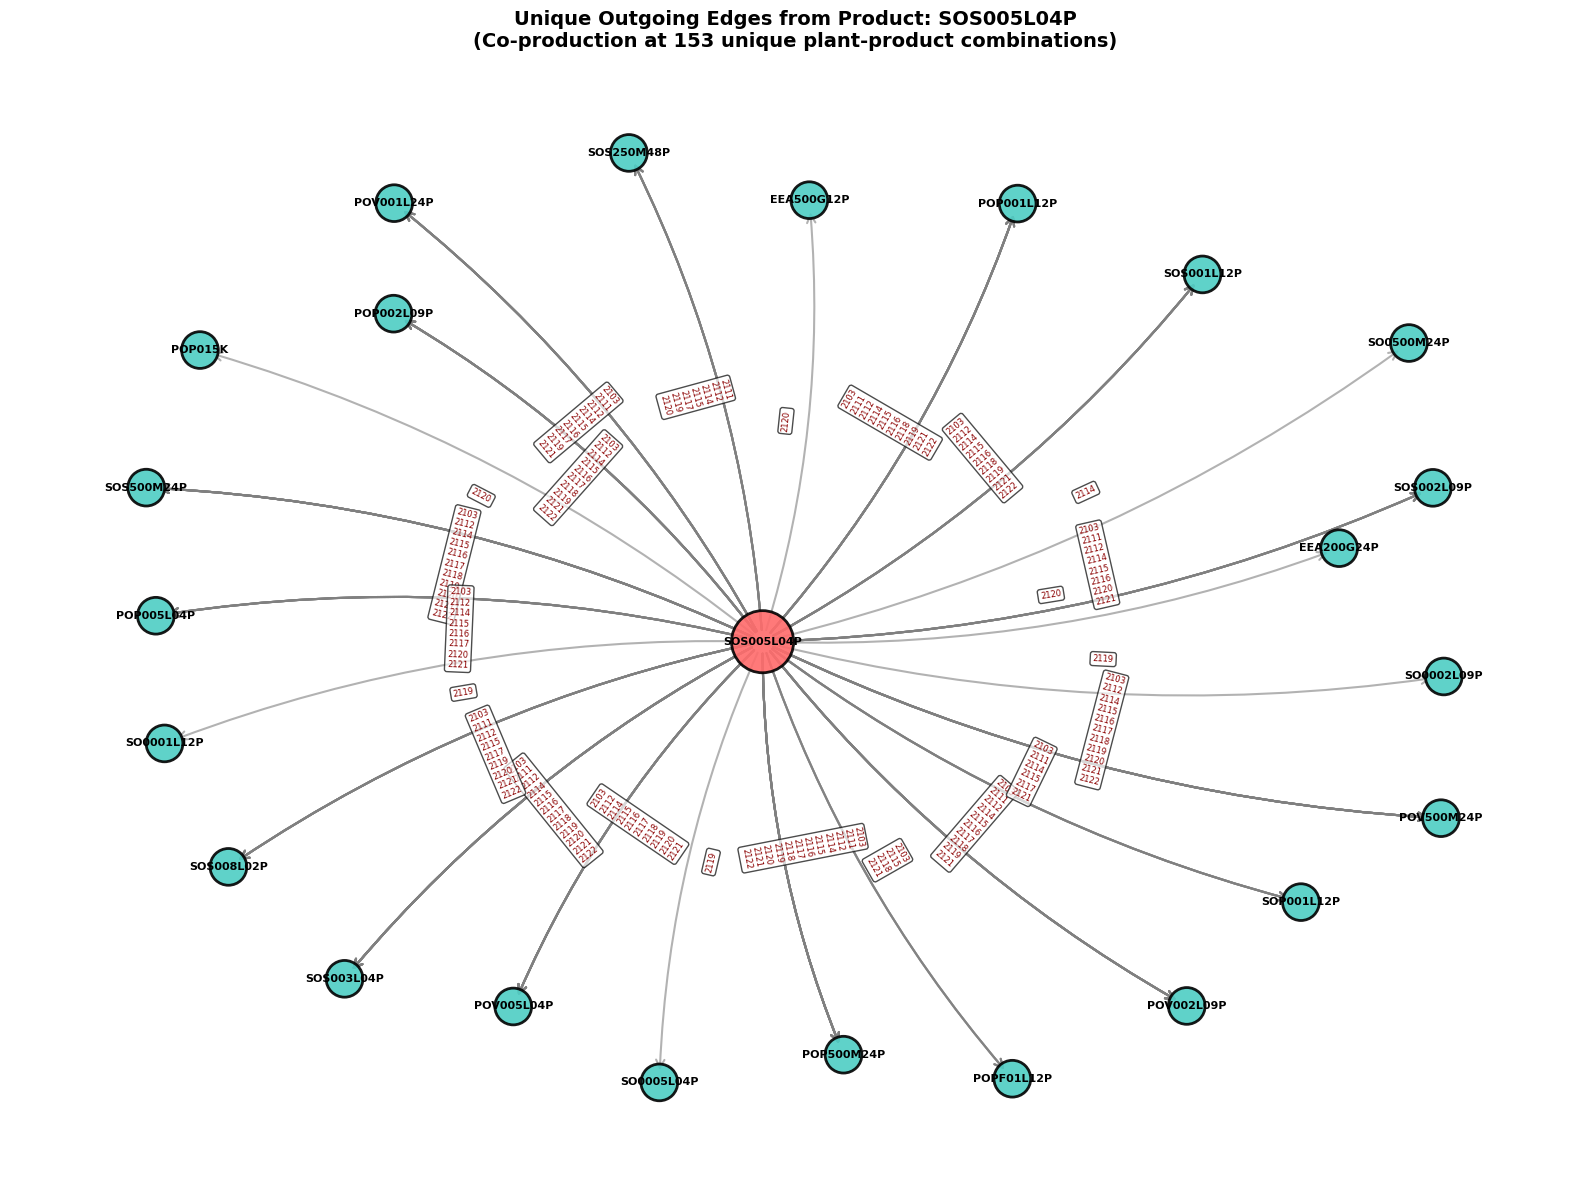


Detailed Edge Information:
Products connected to SOS005L04P: 23

Products and their plants:
  SOS005L04P → EEA200G24P: 1 plant(s) - [2120]
  SOS005L04P → EEA500G12P: 1 plant(s) - [2120]
  SOS005L04P → POP001L12P: 10 plant(s) - [2103, 2111, 2112, 2114, 2115, 2116, 2118, 2119, 2121, 2122]
  SOS005L04P → POP002L09P: 10 plant(s) - [2103, 2112, 2114, 2115, 2116, 2117, 2118, 2119, 2121, 2122]
  SOS005L04P → POP005L04P: 8 plant(s) - [2103, 2112, 2114, 2115, 2116, 2117, 2120, 2121]
  SOS005L04P → POP015K: 1 plant(s) - [2120]
  SOS005L04P → POP500M24P: 12 plant(s) - [2103, 2111, 2112, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122]
  SOS005L04P → POPF01L12P: 4 plant(s) - [2103, 2115, 2118, 2121]
  SOS005L04P → POV001L24P: 9 plant(s) - [2103, 2111, 2112, 2114, 2115, 2116, 2117, 2119, 2121]
  SOS005L04P → POV002L09P: 10 plant(s) - [2103, 2111, 2112, 2114, 2115, 2116, 2117, 2118, 2119, 2121]
  SOS005L04P → POV005L04P: 10 plant(s) - [2103, 2112, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121

In [6]:
# Filter edges where product is ONLY in node1 (source)
filtered = df_edges_plant[df_edges_plant['node1'] == product].copy()

# Get unique rows based on (node2, Plant) combination
unique_filtered = filtered.drop_duplicates(subset=['node2', 'Plant']).reset_index(drop=True)

print(f"Total rows: {len(filtered)}")
print(f"Unique (node2, Plant) combinations: {len(unique_filtered)}")
display(unique_filtered)

import os
fig_path = os.path.join('..', 'figures')
os.makedirs(fig_path, exist_ok=True)

# Build MultiDiGraph to preserve all unique plant-product relationships
G_sub = nx.MultiDiGraph()

for _, r in unique_filtered.iterrows():
    u = r['node1']
    v = r['node2']
    plant = r.get('Plant', 'Unknown')
    G_sub.add_edge(u, v, plant=plant)

# Ensure product node present even if isolated
if product not in G_sub:
    G_sub.add_node(product)

print(f"\nGraph Statistics:")
print(f"Nodes in graph: {G_sub.number_of_nodes()}")
print(f"Total edges (multi-edges): {G_sub.number_of_edges()}")
print(f"Unique products connected: {len([n for n in G_sub.nodes() if n != product])}")

# Visualize
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G_sub, k=2, seed=42, iterations=50)

# Styling - highlight the source product
node_colors = ['#FF6B6B' if n == product else '#4ECDC4' for n in G_sub.nodes()]
node_sizes = [2000 if n == product else 700 for n in G_sub.nodes()]

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=node_sizes, 
                       edgecolors='black', linewidths=2, alpha=0.9)
nx.draw_networkx_labels(G_sub, pos, font_size=8, font_weight='bold')

# Draw edges with slight offset for multi-edges
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', width=1.5, alpha=0.6,
                       arrowsize=15, arrowstyle='->', connectionstyle='arc3,rad=0.1')

# Edge labels showing plant information for each unique edge
edge_labels = {}
for u, v, key, data in G_sub.edges(data=True, keys=True):
    plant = data.get('plant', 'N/A')
    # Create unique label for each multi-edge
    if (u, v) in edge_labels:
        edge_labels[(u, v)] += f"\n{plant}"
    else:
        edge_labels[(u, v)] = str(plant)

if edge_labels:
    nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, 
                                 font_size=6, font_color='darkred', 
                                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.title(f"Unique Outgoing Edges from Product: {product}\n(Co-production at {len(unique_filtered)} unique plant-product combinations)", 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()

out_file = os.path.join(fig_path, f'product_unique_outgoing_edges_{product}.png')
plt.savefig(out_file, dpi=200, bbox_inches='tight')
plt.show()

# Print detailed statistics
print(f"\nDetailed Edge Information:")
print(f"Products connected to {product}: {G_sub.number_of_nodes() - 1}")

# Group by node2 to show multiple plants per product
plant_by_product = unique_filtered.groupby('node2')['Plant'].apply(list).to_dict()
print(f"\nProducts and their plants:")
for neighbor, plants in sorted(plant_by_product.items()):
    print(f"  {product} → {neighbor}: {len(plants)} plant(s) - {plants}")

## Dataset Relationships

### 1. **Core Graph Structure**
The datasets form a **heterogeneous supply chain graph** with multiple relationship types:

**Nodes (Products):**
- [`df_nodes`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 41 products (primary entities)
- [`df_nodes_productgroup_and_subgroup`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): Product hierarchy classifications
- [`df_nodes_plant_and_storage`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 6,545 facilities (plants and storage locations)

**Edges (Relationships):**
- [`df_edges_plant`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 1,647 edges connecting products to plants (co-production relationships)
- [`df_edges_product_group`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 188 edges for product group membership
- [`df_edges_product_subgroup`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 52 edges for sub-group classification
- [`df_edges_storage_location`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): 3,046 edges for storage co-location

### 2. **Temporal Dimension**
Each temporal dataset has **221 time steps × 42 products**:

**Flow Types:**
- [`df_production`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): Production at facilities
- [`df_sales_order`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): Customer demand
- [`df_factory_issue`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): Internal transfers
- [`df_delivery_to_distributor`](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/my_code_13-11-2025_03_tables_figuring_out_02.ipynb): Outbound shipments

## Maximum Data Extraction Strategy



In [7]:
# 1. BUILD UNIFIED HETEROGENEOUS GRAPH
def build_unified_graph():
    """
    Combine all edge types into a single heterogeneous graph
    """
    G = nx.MultiGraph()  # Allow multiple edge types between nodes
    
    # Add nodes with attributes
    for _, row in df_nodes_plant_and_storage.iterrows():
        G.add_node(
            row['Node'], 
            node_type='product',
            plant=row.get('Plant'),
            storage=row.get('Storage Location'),
            group=None,
            subgroup=None
        )
    
    # Add edges with relationship types
    edge_datasets = {
        'co_production': df_edges_plant,
        'product_group': df_edges_product_group,
        'subgroup': df_edges_product_subgroup,
        'co_location': df_edges_storage_location
    }
    
    for rel_type, edge_df in edge_datasets.items():
        for _, edge in edge_df.iterrows():
            G.add_edge(
                edge['node1'], 
                edge['node2'],
                relationship=rel_type,
                facility=edge.get('Plant') or edge.get('Storage Location'),
                group_code=edge.get('GroupCode'),
                subgroup_code=edge.get('SubGroupCode')
            )
    
    return G


# 2. ENRICH WITH TEMPORAL FEATURES
def add_temporal_features(G):
    """
    Add aggregated temporal statistics to nodes
    """
    temporal_dfs = {
        'production': df_production,
        'sales': df_sales_order,
        'factory_issue': df_factory_issue,
        'delivery': df_delivery_to_distributor
    }
    
    for node in G.nodes():
        if node in df_production.columns:
            for name, df in temporal_dfs.items():
                # Aggregate statistics
                G.nodes[node][f'{name}_total'] = df[node].sum()
                G.nodes[node][f'{name}_mean'] = df[node].mean()
                G.nodes[node][f'{name}_std'] = df[node].std()
                G.nodes[node][f'{name}_trend'] = np.polyfit(
                    range(len(df)), df[node], 1
                )[0]  # Linear trend slope
    
    return G


# 3. CREATE TEMPORAL SNAPSHOT GRAPHS
def create_temporal_snapshots(num_snapshots=10):
    """
    Create graph snapshots at different time windows
    """
    snapshots = []
    window_size = len(df_production) // num_snapshots
    
    for i in range(num_snapshots):
        start_idx = i * window_size
        end_idx = start_idx + window_size
        
        # Get temporal data for this window
        window_data = {
            'production': df_production.iloc[start_idx:end_idx],
            'sales': df_sales_order.iloc[start_idx:end_idx],
            'factory_issue': df_factory_issue.iloc[start_idx:end_idx],
            'delivery': df_delivery_to_distributor.iloc[start_idx:end_idx]
        }
        
        # Build graph with window-specific features
        G_snapshot = build_unified_graph()
        
        # Add temporal features for this window
        for node in G_snapshot.nodes():
            if node in df_production.columns:
                for name, df in window_data.items():
                    G_snapshot.nodes[node][f'{name}_total'] = df[node].sum()
        
        snapshots.append(G_snapshot)
    
    return snapshots


# 4. EXTRACT MULTI-LEVEL FEATURES (FIXED FOR MULTIGRAPH)
def extract_comprehensive_features(G):
    """
    Extract node, edge, and graph-level features
    Convert to simple graph for metrics that don't support multigraph
    """
    features = {
        'node_features': {},
        'edge_features': {},
        'graph_features': {}
    }
    
    # Convert to simple graph for calculating metrics
    G_simple = nx.Graph(G)
    
    # Calculate centrality metrics on simple graph
    betweenness = nx.betweenness_centrality(G_simple)
    clustering = nx.clustering(G_simple)
    
    # Node-level features
    for node in G.nodes():
        features['node_features'][node] = {
            'degree': G.degree(node),  # Total degree including multi-edges
            'unique_neighbors': G_simple.degree(node),  # Unique neighbors
            'clustering': clustering[node],
            'betweenness': betweenness[node],
            **G.nodes[node]  # All temporal features
        }
    
    # Edge-level features
    for u, v, key, data in G.edges(data=True, keys=True):
        features['edge_features'][(u, v, key)] = {
            'relationship_type': data['relationship'],
            'facility': data.get('facility'),
            'weight': 1
        }
    
    # Graph-level features
    features['graph_features'] = {
        'num_nodes': G.number_of_nodes(),
        'num_edges': G.number_of_edges(),
        'num_unique_edges': G_simple.number_of_edges(),
        'density': nx.density(G_simple),
        'avg_clustering': nx.average_clustering(G_simple),
        'num_components': nx.number_connected_components(G_simple)
    }
    
    return features


# 5. BUILD PRODUCT SIMILARITY NETWORK
def build_product_similarity_network(threshold=0.7):
    """
    Create edges based on temporal correlation
    """
    G_similarity = nx.Graph()
    
    # Calculate correlations across all temporal data
    all_temporal = pd.concat([
        df_production.set_index('Date'),
        df_sales_order.set_index('Date'),
        df_factory_issue.set_index('Date'),
        df_delivery_to_distributor.set_index('Date')
    ], axis=0).groupby(level=0).sum()
    
    corr_matrix = all_temporal.corr()
    
    # Add edges for highly correlated products
    for i, product1 in enumerate(corr_matrix.columns):
        for j, product2 in enumerate(corr_matrix.columns[i+1:], i+1):
            correlation = corr_matrix.iloc[i, j]
            if abs(correlation) > threshold:
                G_similarity.add_edge(
                    product1, 
                    product2,
                    weight=correlation,
                    edge_type='temporal_correlation'
                )
    
    return G_similarity


# 6. USAGE EXAMPLE
try:
    # Build complete graph
    G_unified = build_unified_graph()
    G_unified = add_temporal_features(G_unified)
    
    # Get temporal snapshots for dynamic analysis
    snapshots = create_temporal_snapshots(num_snapshots=10)
    
    # Extract all features
    features = extract_comprehensive_features(G_unified)
    
    # Build similarity network
    G_similarity = build_product_similarity_network(threshold=0.7)
    
    print(f"Unified Graph: {G_unified.number_of_nodes()} nodes, {G_unified.number_of_edges()} edges")
    print(f"Similarity Network: {G_similarity.number_of_nodes()} nodes, {G_similarity.number_of_edges()} edges")
    print(f"Created {len(snapshots)} temporal snapshots")
    
    # Show sample node features
    print("\nSample Node Features:")
    sample_node = list(features['node_features'].keys())[0]
    print(f"{sample_node}: {features['node_features'][sample_node]}")
    
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()

Unified Graph: 40 nodes, 4933 edges
Similarity Network: 21 nodes, 22 edges
Created 10 temporal snapshots

Sample Node Features:
POV002L09P: {'degree': 445, 'unique_neighbors': 39, 'clustering': 0.8704453441295547, 'betweenness': 0.0057447334323970705, 'node_type': 'product', 'plant': 2103, 'storage': 330.0, 'group': None, 'subgroup': None, 'production_total': np.int64(125087), 'production_mean': np.float64(566.0045248868778), 'production_std': np.float64(783.90629366791), 'production_trend': np.float64(1.1132300132300137), 'sales_total': np.float64(121369.0), 'sales_mean': np.float64(549.1809954751131), 'sales_std': np.float64(563.3689278882122), 'sales_trend': np.float64(0.4188977953683842), 'factory_issue_total': np.float64(120297.78), 'factory_issue_mean': np.float64(544.3338461538461), 'factory_issue_std': np.float64(495.7169275504316), 'factory_issue_trend': np.float64(0.779174729562964), 'delivery_total': np.float64(120944.0), 'delivery_mean': np.float64(547.2579185520362), 'deli



## Key Insights for Maximum Data Extraction

1. **Multi-relational Structure**: Products are connected through 4 different relationship types (co-production, group membership, sub-group, co-location)

2. **Temporal Dynamics**: 221 time steps provide rich temporal patterns for forecasting and causal analysis

3. **Hierarchical Information**: Product groups → Products → Facilities creates multi-level analysis opportunities

4. **Complete Coverage**: 100% data completeness (from [eda_summary.csv](Supply_Chain/SupplyGraph/Code/Developing heterogeneous graph/eda_summary.csv)) means no missing data to handle

5. **Network Metrics**: With 4,933 total edges across 41 products, the graph is highly connected (dense supply chain)

This approach allows you to leverage:
- **Static graph structure** for relationship analysis
- **Temporal sequences** for demand forecasting and causality
- **Multi-level features** for comprehensive predictions
- **Dynamic snapshots** for time-varying graph neural networks

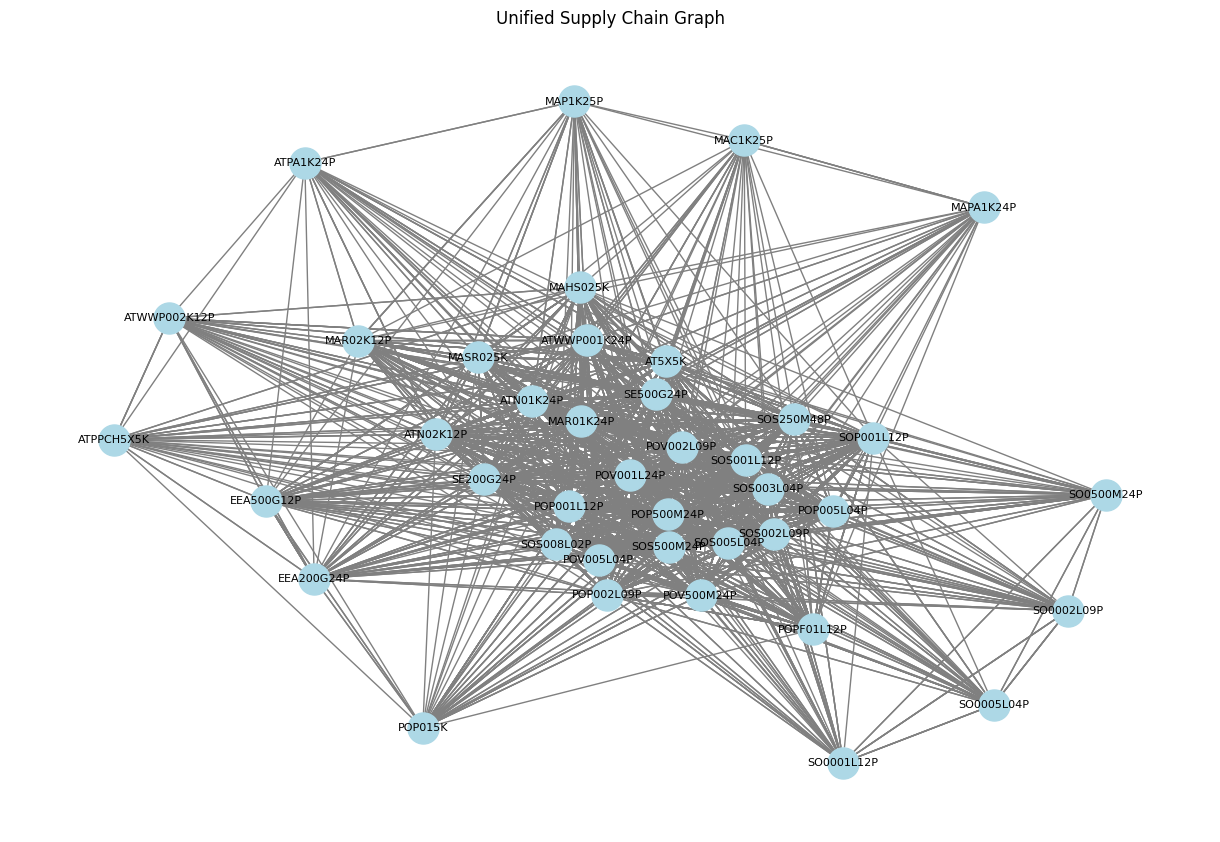

In [8]:
# Visualize the unified graph

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_unified)  # Use spring layout for positioning
nx.draw(G_unified, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray')
plt.title('Unified Supply Chain Graph')
plt.show()

Facility and Classification Info:


,Attribute,Value
0,Product,SOS005L04P
1,Production Plants,"2103, 2111, 2112, 2114, 2115, 2116, 2117, 2118..."
2,Storage Locations,"2030.0, 1130.0, 2130.0, 1930.0, 1430.0, 1630.0..."
3,Product Group,S
4,Product Subgroup,SOS



Subgraph Nodes:


,Node,Type
0,POV002L09P,Related
1,SOS001L12P,Related
2,POP002L09P,Related
3,POP001L12P,Related
4,POV001L24P,Related
5,SOS005L04P,Product
6,POP500M24P,Related
7,ATN01K24P,Related
8,ATN02K12P,Related
9,MAR02K12P,Related



Subgraph Edges (limited):


,Source,Target,Relationship,Facility
0,POV002L09P,SOS005L04P,co_production,2103.0
1,POV002L09P,SOS005L04P,co_production,2111.0
2,POV002L09P,SOS005L04P,co_production,2112.0
3,POV002L09P,SOS005L04P,co_location,330.0
4,POV002L09P,SOS005L04P,co_location,1130.0
5,POV002L09P,SOS005L04P,co_location,1230.0
6,POV002L09P,POV001L24P,product_group,NaN
7,POV002L09P,POV001L24P,subgroup,NaN
8,POV002L09P,POV500M24P,product_group,NaN
9,POV002L09P,POV500M24P,subgroup,NaN



Temporal Features for SOS005L04P:


,Feature,Value
0,production_total,1.482784e+06
1,production_mean,6.709430e+03
2,production_std,4.802587e+03
3,production_trend,-2.928006e+01
4,sales_total,1.521854e+06
5,sales_mean,6.886215e+03
6,sales_std,6.104767e+03
7,sales_trend,-2.842134e+01
8,factory_issue_total,1.476175e+06
9,factory_issue_mean,6.679526e+03


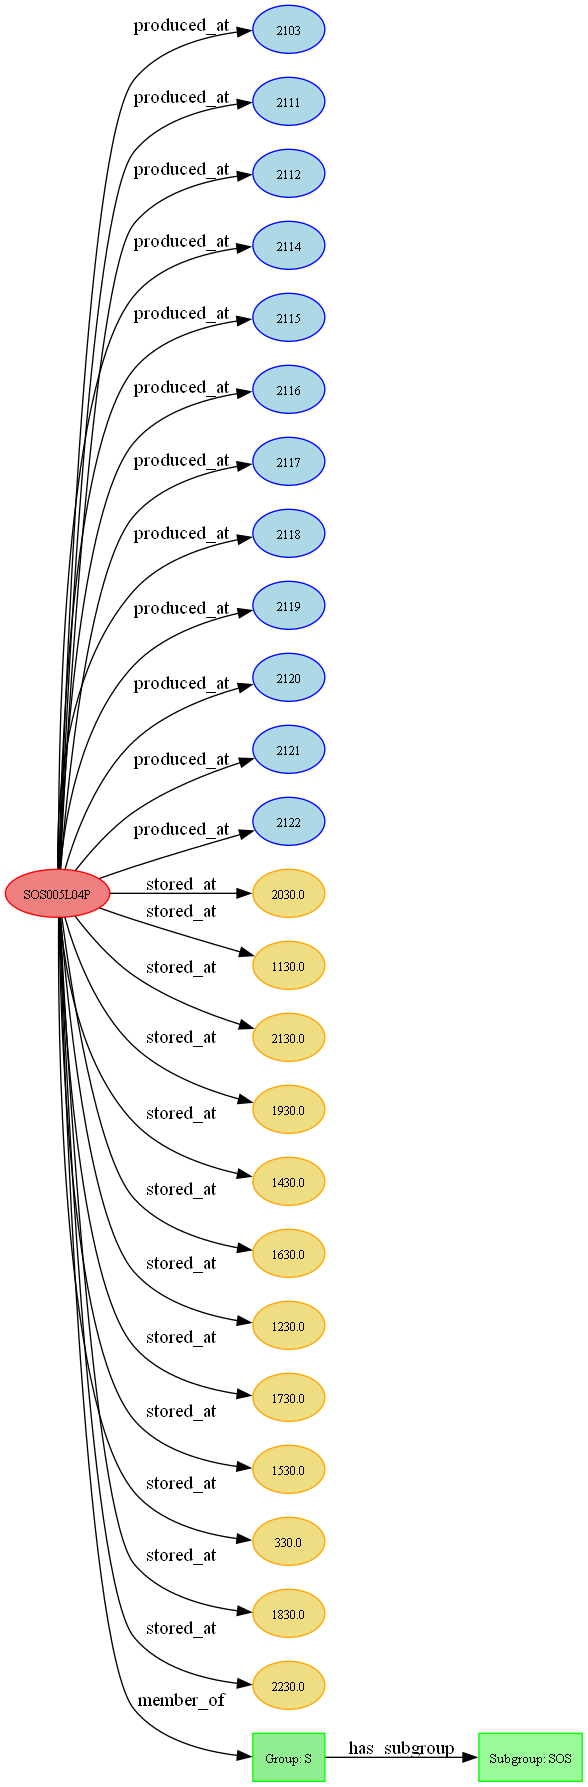

In [9]:
# Assuming G_unified is built and enriched
product_node = 'SOS005L04P'
max_edges_per_type = 3  # Default: 3 edges per relationship type

# 1. Get facility and classification info as DataFrame
def get_product_facilities_df(product_name):
    plants = df_edges_plant[df_edges_plant['node1'] == product_name]['Plant'].unique()
    storage = df_nodes_plant_and_storage[df_nodes_plant_and_storage['Node'] == product_name]['Storage Location'].unique()
    product_info = df_nodes_productgroup_and_subgroup[df_nodes_productgroup_and_subgroup['Node'] == product_name]
    
    data = {
        'Attribute': ['Product', 'Production Plants', 'Storage Locations', 'Product Group', 'Product Subgroup'],
        'Value': [
            product_name,
            ', '.join(str(p) for p in plants) if len(plants) > 0 else 'None',
            ', '.join(str(s) for s in storage) if len(storage) > 0 else 'None',
            product_info['Group'].values[0] if not product_info.empty else 'None',
            product_info['Sub-Group'].values[0] if not product_info.empty else 'None'
        ]
    }
    return pd.DataFrame(data)

facility_df = get_product_facilities_df(product_node)
print("Facility and Classification Info:")
display(facility_df)

# 2. Get subgraph and relations as DataFrames
neighbors = list(G_unified.neighbors(product_node))
nodes_to_include = [product_node] + neighbors
subgraph = G_unified.subgraph(nodes_to_include)

# Nodes DataFrame
nodes_df = pd.DataFrame({
    'Node': list(subgraph.nodes()),
    'Type': ['Product' if n == product_node else 'Related' for n in subgraph.nodes()]
})
print("\nSubgraph Nodes:")
display(nodes_df)

# Edges DataFrame with limit per type
edges_data = []
edge_count = {}
for u, v, key, data in subgraph.edges(data=True, keys=True):
    rel = data['relationship']
    if rel not in edge_count:
        edge_count[rel] = 0
    if edge_count[rel] < max_edges_per_type:
        edges_data.append({
            'Source': u,
            'Target': v,
            'Relationship': rel,
            'Facility': data.get('facility', 'N/A')
        })
        edge_count[rel] += 1

edges_df = pd.DataFrame(edges_data)
print("\nSubgraph Edges (limited):")
display(edges_df)

# 3. Get temporal features as DataFrame
if product_node in G_unified.nodes():
    temporal_features = {k: v for k, v in G_unified.nodes[product_node].items() if 'total' in k or 'mean' in k or 'std' in k or 'trend' in k}
    temporal_df = pd.DataFrame(list(temporal_features.items()), columns=['Feature', 'Value'])
    print(f"\nTemporal Features for {product_node}:")
    display(temporal_df)


# 4. Visualization
idx = facility_df.set_index('Attribute')['Value']

product = idx.get('Product', product_node)
plants = [] if idx.get('Production Plants', 'None') in (None, 'None', '') else [p.strip() for p in idx['Production Plants'].split(',') if p.strip()]
storages = [] if idx.get('Storage Locations', 'None') in (None, 'None', '') else [s.strip() for s in idx['Storage Locations'].split(',') if s.strip()]
group = None if idx.get('Product Group', 'None') in (None, 'None', '') else idx['Product Group']
subgroup = None if idx.get('Product Subgroup', 'None') in (None, 'None', '') else idx['Product Subgroup']

# Create Graphviz diagram with only connected nodes
dot = Digraph(comment='Facility & Classification Subgraph')
dot.attr(rankdir='LR', size='20,200')
dot.attr('node', style='filled', fontsize='10')

# Add main product node
dot.node(product, product, fillcolor='lightcoral', color='red')

# Add facility nodes and edges (only if present)
for p in plants:
    dot.node(p, p, fillcolor='lightblue', color='blue')
    dot.edge(product, p, label='produced_at')

for s in storages:
    dot.node(s, s, fillcolor='lightgoldenrod', color='orange')
    dot.edge(product, s, label='stored_at')

# Add classification nodes and edges
if group:
    dot.node(group, f'Group: {group}', fillcolor='lightgreen', color='green', shape='box')
    dot.edge(product, group, label='member_of')

if subgroup:
    dot.node(subgroup, f'Subgroup: {subgroup}', fillcolor='palegreen', color='green', shape='box')
    # connect subgroup to group if both exist, else connect product to subgroup
    if group:
        dot.edge(group, subgroup, label='has_subgroup')
    else:
        dot.edge(product, subgroup, label='member_of_subgroup')

# If no edges were added, add a small note node
if not (plants or storages or group or subgroup):
    dot.node('note', 'No connected facilities or classifications found', shape='note', fillcolor='lightgrey')

# Render and display
out_path = '../figures/facility_subgraph'
dot.render(out_path, format='png', cleanup=True)
display(Image(f'{out_path}.png'))

<br> <br> <br> <br>



## Sales Order Process Flow

The ordering process involves these key datasets and stages:

### 1. **Order Initiation (Sales Order)**
- **Dataset**: [`df_sales_order`]
- **What it captures**: Customer demand/orders for each product over time
- **Temporal range**: 2023-01-01 to 2023-08-07 (from the CSV excerpts)
- **Structure**: Each row = date, each column = product SKU (e.g., `SOS008L02P`, `SOS005L04P`, etc.)

### 2. **Production Response**
- **Dataset**: [`df_production`]
- **What it captures**: Units produced at manufacturing facilities in response to orders
- **Connection**: Links to [`df_edges_plant`]

### 3. **Internal Transfer (Factory Issue)**
- **Dataset**: [`df_factory_issue`]
- **What it captures**: Movement of products from production facilities to storage locations
- **Connection**: Links production facilities ([`df_nodes_plant_and_storage`]

### 4. **Order Fulfillment (Delivery)**
- **Dataset**: [`df_delivery_to_distributor`]
- **What it captures**: Final shipment from storage/plant to distributors/customers
- **Connection**: Uses [`df_edges_storage_location`]

## Complete Ordering Workflow



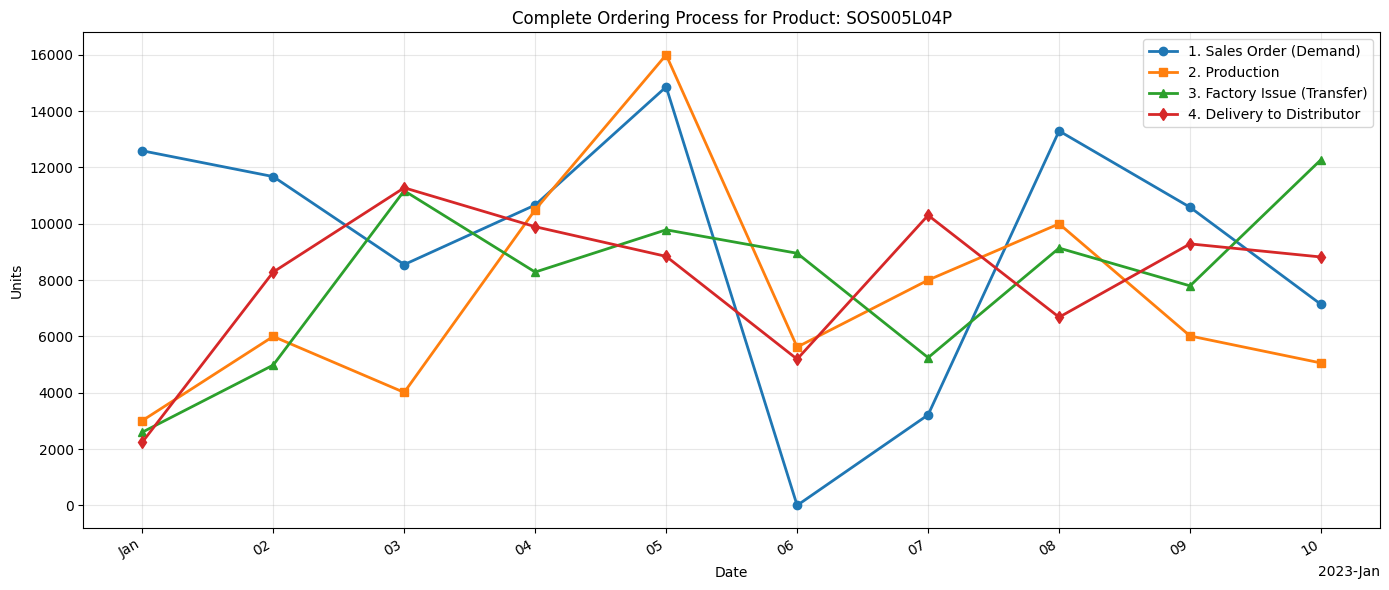

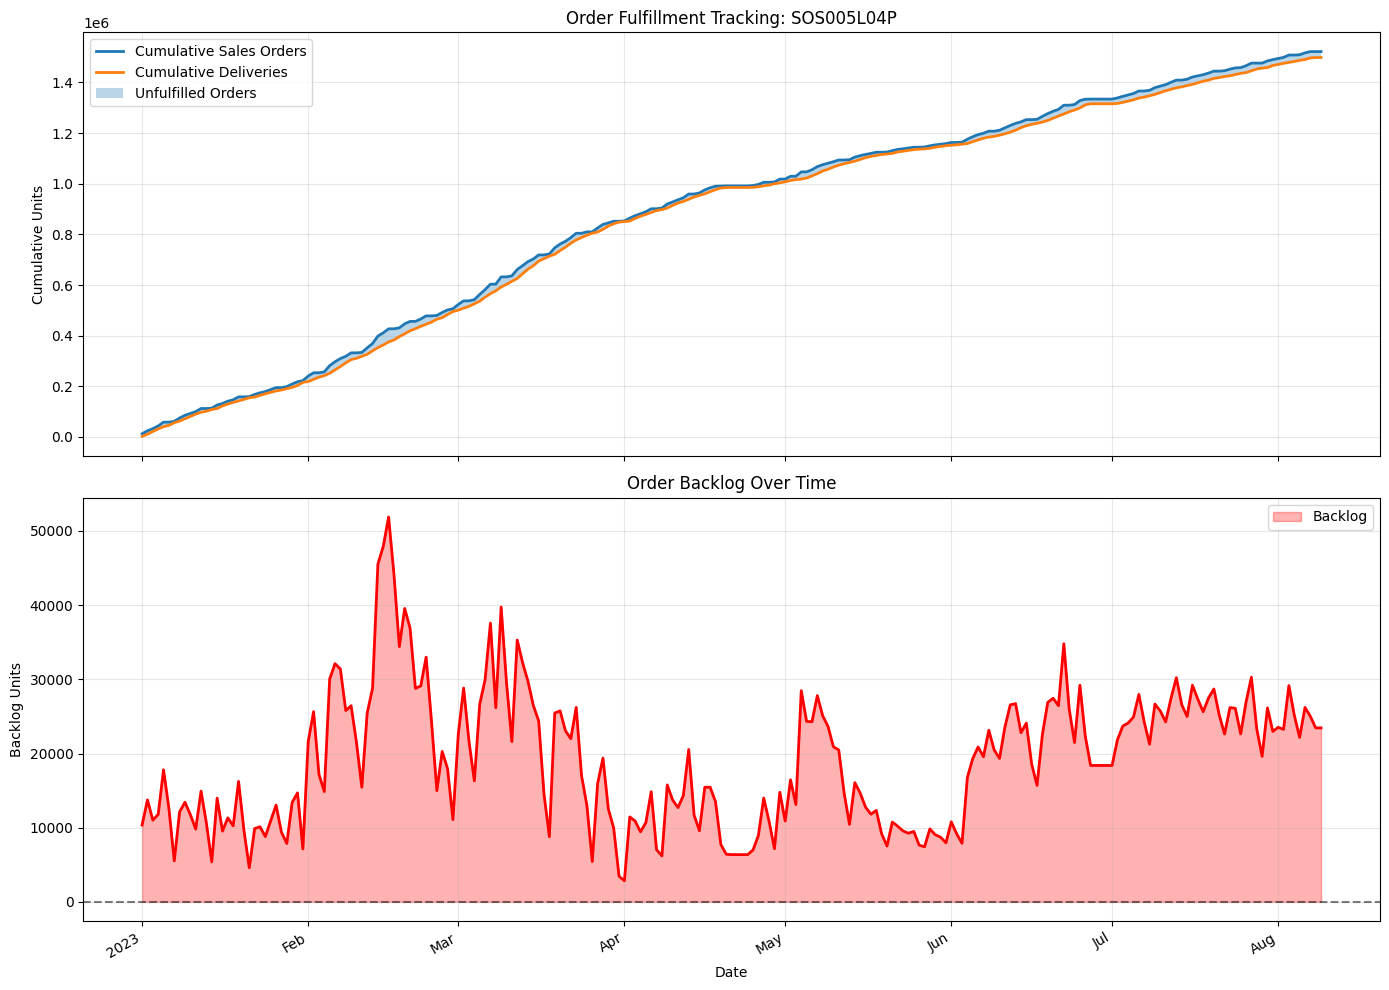


Product Facility Information:
{'product': 'SOS005L04P', 'production_plants': [np.int64(2103), np.int64(2111), np.int64(2112), np.int64(2114), np.int64(2115), np.int64(2116), np.int64(2117), np.int64(2118), np.int64(2119), np.int64(2120), np.int64(2121), np.int64(2122)], 'storage_locations': [np.float64(2030.0), np.float64(1130.0), np.float64(2130.0), np.float64(1930.0), np.float64(1430.0), np.float64(1630.0), np.float64(1230.0), np.float64(1730.0), np.float64(1530.0), np.float64(330.0), np.float64(1830.0), np.float64(2230.0)], 'product_group': 'S', 'product_subgroup': 'SOS'}

Sample Timeline Data:


,Date,Sales_Order,Production,Factory_Issue,Delivery
0,2023-01-01,12594.00,3008,2598.0,2241.00
1,2023-01-02,11677.00,6000,4982.0,8286.00
2,2023-01-03,8551.00,4012,11175.0,11279.75
3,2023-01-04,10667.25,10497,8286.0,9897.00
4,2023-01-05,14864.00,16000,9787.0,8843.25
5,2023-01-06,0.00,5623,8954.0,5193.00
6,2023-01-07,3216.00,8001,5247.0,10303.00
7,2023-01-08,13298.00,10000,9138.0,6683.00
8,2023-01-09,10586.50,6017,7796.0,9287.25
9,2023-01-10,7137.00,5057,12280.0,8821.25



Order Fulfillment Statistics:
Average Backlog: 19153.01 units
Max Backlog: 51877.75 units
Order Fulfillment Rate: 98.46%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_ordering_process(product_name='SOS005L04P', start_date='2023-01-01', end_date='2023-02-01'):
    """
    Trace the complete ordering process for a specific product
    """
    # Ensure Date column is datetime
    df_sales_order['Date'] = pd.to_datetime(df_sales_order['Date'])
    df_production['Date'] = pd.to_datetime(df_production['Date'])
    df_factory_issue['Date'] = pd.to_datetime(df_factory_issue['Date'])
    df_delivery_to_distributor['Date'] = pd.to_datetime(df_delivery_to_distributor['Date'])

    # Filter date range
    mask = (df_sales_order['Date'] >= pd.to_datetime(start_date)) & (df_sales_order['Date'] <= pd.to_datetime(end_date))
    
    # Extract data for the product
    sales_data = df_sales_order.loc[mask, ['Date', product_name]].rename(columns={product_name: 'Sales_Order'})
    production_data = df_production.loc[mask, ['Date', product_name]].rename(columns={product_name: 'Production'})
    factory_issue_data = df_factory_issue.loc[mask, ['Date', product_name]].rename(columns={product_name: 'Factory_Issue'})
    delivery_data = df_delivery_to_distributor.loc[mask, ['Date', product_name]].rename(columns={product_name: 'Delivery'})
    
    # Merge all data
    timeline = sales_data.merge(production_data, on='Date') \
                         .merge(factory_issue_data, on='Date') \
                         .merge(delivery_data, on='Date')

    # Plot
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(timeline['Date'], timeline['Sales_Order'], marker='o', label='1. Sales Order (Demand)', linewidth=2)
    ax.plot(timeline['Date'], timeline['Production'], marker='s', label='2. Production', linewidth=2)
    ax.plot(timeline['Date'], timeline['Factory_Issue'], marker='^', label='3. Factory Issue (Transfer)', linewidth=2)
    ax.plot(timeline['Date'], timeline['Delivery'], marker='d', label='4. Delivery to Distributor', linewidth=2)

    # Better date formatting
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax.set_xlabel('Date')
    ax.set_ylabel('Units')
    ax.set_title(f'Complete Ordering Process for Product: {product_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return timeline

def get_product_facilities(product_name):
    """
    Find which facilities handle a specific product
    """
    # Production facilities
    plants = df_edges_plant[df_edges_plant['node1'] == product_name]['Plant'].unique()
    
    # Storage locations
    storage = df_nodes_plant_and_storage[df_nodes_plant_and_storage['Node'] == product_name]['Storage Location'].unique()
    
    # Product classification
    product_info = df_nodes_productgroup_and_subgroup[df_nodes_productgroup_and_subgroup['Node'] == product_name]
    
    return {
        'product': product_name,
        'production_plants': list(plants),
        'storage_locations': list(storage),
        'product_group': product_info['Group'].values[0] if not product_info.empty else None,
        'product_subgroup': product_info['Sub-Group'].values[0] if not product_info.empty else None
    }


def analyze_order_fulfillment_lag(product_name='SOS005L04P'):
    """
    Calculate time lag between order placement and fulfillment
    """
    # Ensure Date column is datetime
    df_sales_order['Date'] = pd.to_datetime(df_sales_order['Date'])
    df_delivery_to_distributor['Date'] = pd.to_datetime(df_delivery_to_distributor['Date'])

    # Calculate cumulative values (align indices by date)
    cumulative_sales = df_sales_order[product_name].cumsum()
    cumulative_delivery = df_delivery_to_distributor[product_name].cumsum()
    
    # Lag analysis
    lag_df = pd.DataFrame({
        'Date': df_sales_order['Date'],
        'Cumulative_Orders': cumulative_sales,
        'Cumulative_Deliveries': cumulative_delivery,
        'Backlog': cumulative_sales - cumulative_delivery
    })

    # Plot with shared x-axis and clean date ticks
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Cumulative comparison
    ax1.plot(lag_df['Date'], lag_df['Cumulative_Orders'], label='Cumulative Sales Orders', linewidth=2)
    ax1.plot(lag_df['Date'], lag_df['Cumulative_Deliveries'], label='Cumulative Deliveries', linewidth=2)
    ax1.fill_between(lag_df['Date'], lag_df['Cumulative_Orders'], lag_df['Cumulative_Deliveries'], alpha=0.3, label='Unfulfilled Orders')
    ax1.set_ylabel('Cumulative Units')
    ax1.set_title(f'Order Fulfillment Tracking: {product_name}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Backlog
    ax2.plot(lag_df['Date'], lag_df['Backlog'], color='red', linewidth=2)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.fill_between(lag_df['Date'], 0, lag_df['Backlog'], where=(lag_df['Backlog'] > 0),
                      color='red', alpha=0.3, label='Backlog')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Backlog Units')
    ax2.set_title('Order Backlog Over Time')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Date locator/formatter applied to both subplots
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax2.xaxis.set_major_locator(locator)
    ax2.xaxis.set_major_formatter(formatter)
    # rotate only the bottom tick labels
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return lag_df


# Example usage
timeline = visualize_ordering_process('SOS005L04P', '2023-01-01', '2023-01-10')
facility_info = get_product_facilities('SOS005L04P')
lag_analysis = analyze_order_fulfillment_lag('SOS005L04P')

print("\nProduct Facility Information:")
print(facility_info)

print("\nSample Timeline Data:")
display(timeline.head(10))

print("\nOrder Fulfillment Statistics:")
print(f"Average Backlog: {lag_analysis['Backlog'].mean():.2f} units")
print(f"Max Backlog: {lag_analysis['Backlog'].max():.2f} units")
print(f"Order Fulfillment Rate: {(lag_analysis['Cumulative_Deliveries'].iloc[-1] / lag_analysis['Cumulative_Orders'].iloc[-1] * 100):.2f}%")



## Key Datasets Involved in Ordering

1. **Sales Order** ([`df_sales_order`] → Customer demand
2. **Production** ([`df_production`] → Manufacturing response
3. **Factory Issue** ([`df_factory_issue`] → Internal logistics
4. **Delivery** ([`df_delivery_to_distributor`] → Final fulfillment

## Structural Connections

- **Products** → **Plants**: [`df_edges_plant`] (1,647 edges)
- **Products** → **Storage**: [`df_edges_storage_location`] (3,046 edges)
- **Products** → **Groups**: [`df_edges_product_group`] (188 edges)

The ordering process flows: **Sales Order → Production → Factory Issue → Delivery**, with facility assignments determined by the edge datasets.

<br> <br> <br>


# The workflow

This workflow might be incorrect.

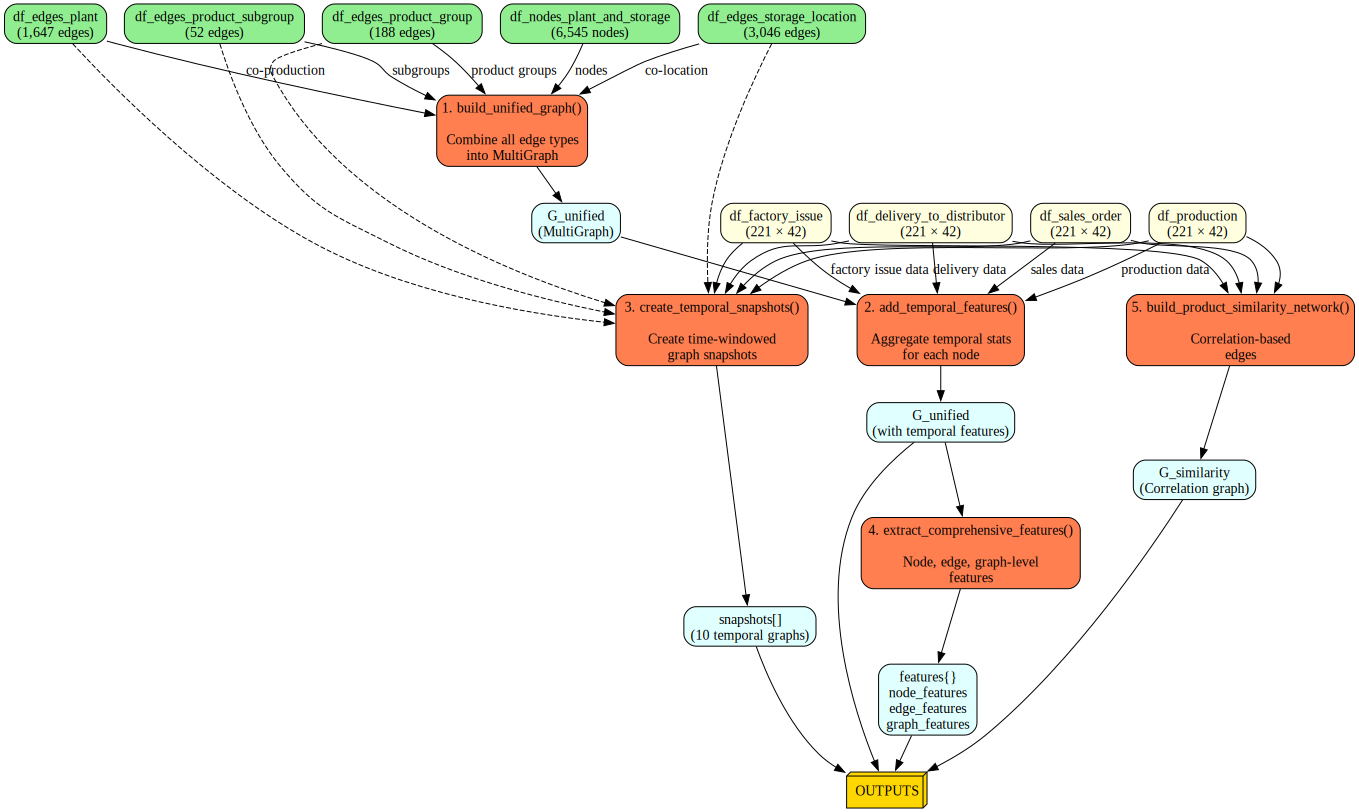

In [11]:
from graphviz import Digraph

# Create workflow diagram
workflow = Digraph('Supply_Chain_Workflow', comment='Data Processing Workflow')
workflow.attr(rankdir='TB', size='20,20')
workflow.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue')

# Input Data
workflow.node('A1', 'df_edges_plant\n(1,647 edges)', fillcolor='lightgreen')
workflow.node('A2', 'df_edges_product_group\n(188 edges)', fillcolor='lightgreen')
workflow.node('A3', 'df_edges_product_subgroup\n(52 edges)', fillcolor='lightgreen')
workflow.node('A4', 'df_edges_storage_location\n(3,046 edges)', fillcolor='lightgreen')
workflow.node('A5', 'df_nodes_plant_and_storage\n(6,545 nodes)', fillcolor='lightgreen')

workflow.node('B1', 'df_production\n(221 × 42)', fillcolor='lightyellow')
workflow.node('B2', 'df_sales_order\n(221 × 42)', fillcolor='lightyellow')
workflow.node('B3', 'df_factory_issue\n(221 × 42)', fillcolor='lightyellow')
workflow.node('B4', 'df_delivery_to_distributor\n(221 × 42)', fillcolor='lightyellow')

# Method 1: Build Unified Graph
workflow.node('C1', '1. build_unified_graph()\n\nCombine all edge types\ninto MultiGraph', fillcolor='coral')
workflow.edge('A1', 'C1', label='co-production')
workflow.edge('A2', 'C1', label='product groups')
workflow.edge('A3', 'C1', label='subgroups')
workflow.edge('A4', 'C1', label='co-location')
workflow.edge('A5', 'C1', label='nodes')

workflow.node('C1_OUT', 'G_unified\n(MultiGraph)', fillcolor='lightcyan')
workflow.edge('C1', 'C1_OUT')

# Method 2: Add Temporal Features
workflow.node('C2', '2. add_temporal_features()\n\nAggregate temporal stats\nfor each node', fillcolor='coral')
workflow.edge('B1', 'C2', label='production data')
workflow.edge('B2', 'C2', label='sales data')
workflow.edge('B3', 'C2', label='factory issue data')
workflow.edge('B4', 'C2', label='delivery data')
workflow.edge('C1_OUT', 'C2')

workflow.node('C2_OUT', 'G_unified\n(with temporal features)', fillcolor='lightcyan')
workflow.edge('C2', 'C2_OUT')

# Method 3: Create Temporal Snapshots
workflow.node('C3', '3. create_temporal_snapshots()\n\nCreate time-windowed\ngraph snapshots', fillcolor='coral')
workflow.edge('B1', 'C3')
workflow.edge('B2', 'C3')
workflow.edge('B3', 'C3')
workflow.edge('B4', 'C3')
workflow.edge('A1', 'C3', style='dashed')
workflow.edge('A2', 'C3', style='dashed')
workflow.edge('A3', 'C3', style='dashed')
workflow.edge('A4', 'C3', style='dashed')

workflow.node('C3_OUT', 'snapshots[]\n(10 temporal graphs)', fillcolor='lightcyan')
workflow.edge('C3', 'C3_OUT')

# Method 4: Extract Features
workflow.node('C4', '4. extract_comprehensive_features()\n\nNode, edge, graph-level\nfeatures', fillcolor='coral')
workflow.edge('C2_OUT', 'C4')

workflow.node('C4_OUT', 'features{}\nnode_features\nedge_features\ngraph_features', fillcolor='lightcyan')
workflow.edge('C4', 'C4_OUT')

# Method 5: Build Similarity Network
workflow.node('C5', '5. build_product_similarity_network()\n\nCorrelation-based\nedges', fillcolor='coral')
workflow.edge('B1', 'C5')
workflow.edge('B2', 'C5')
workflow.edge('B3', 'C5')
workflow.edge('B4', 'C5')

workflow.node('C5_OUT', 'G_similarity\n(Correlation graph)', fillcolor='lightcyan')
workflow.edge('C5', 'C5_OUT')

# Final Outputs
workflow.node('D', 'OUTPUTS', shape='box3d', fillcolor='gold', style='filled')
workflow.edge('C2_OUT', 'D')
workflow.edge('C3_OUT', 'D')
workflow.edge('C4_OUT', 'D')
workflow.edge('C5_OUT', 'D')

# Render
workflow.render('../figures/supply_chain_workflow', format='png', cleanup=True)
display(workflow)